# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [9]:
def recenter_image(im):
    # ssd preprocessing
    im += [123.68, 116.779, 103.939]
    return im

def display_instances(im, bb, clas):
    im = recenter_image(im)
    w, h, _ = im.shape
    # resize the bboxes
    bb[:, [0, 2]] *= w
    bb[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(im.astype(np.uint8))
    for bb, cl in zip(bb, clas):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_im = batch[0]['image'].numpy()
    batched_bb = batch[1]['groundtruth_boxes'].numpy()
    batched_clas = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_im.shape[0]
    for idx in range(batch_size):
        display_instances(batched_im[idx, ...], 
                          batched_bb[idx, :num_bboxes[idx], :],
                          batched_clas[idx, ...])

### Display augmentations

In [10]:
from utils import get_train_input

In [14]:
train_dataset = get_train_input("experiments/reference/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/home/works

INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '

INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.cast` instead.


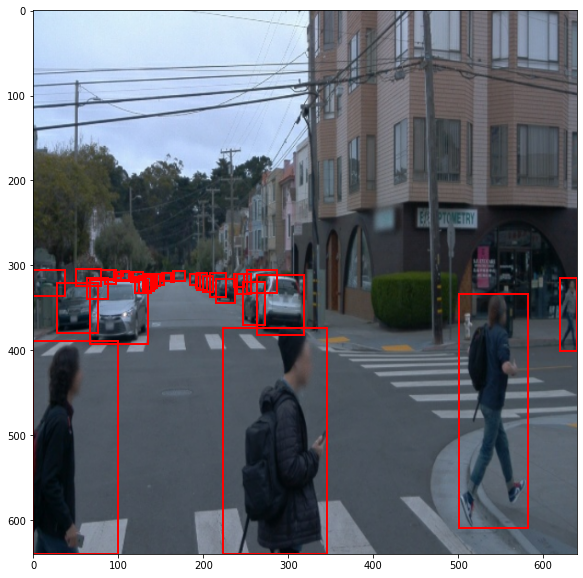

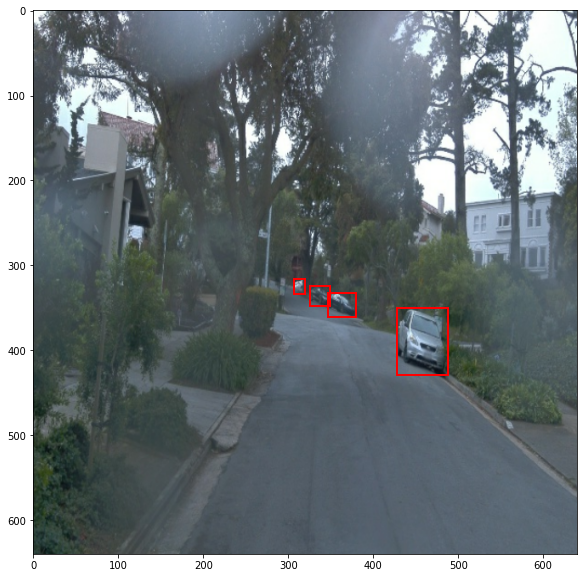

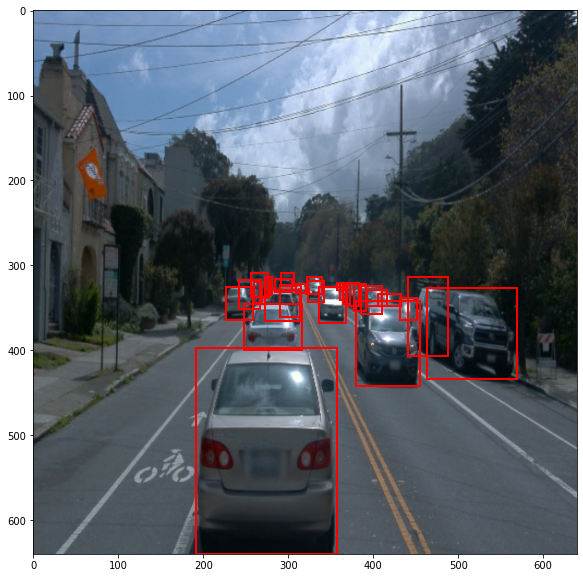

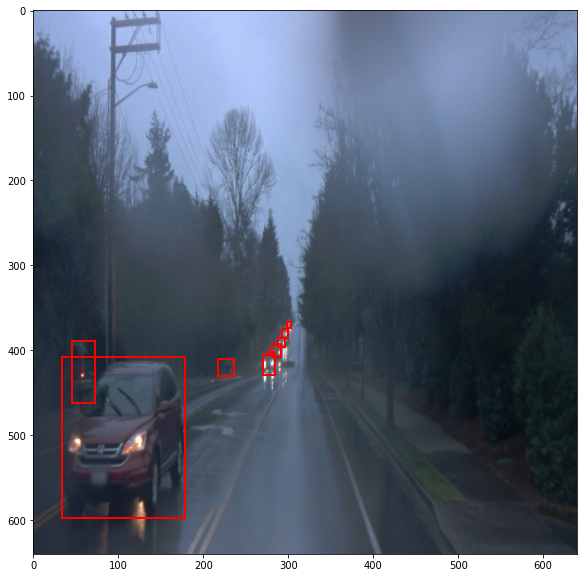

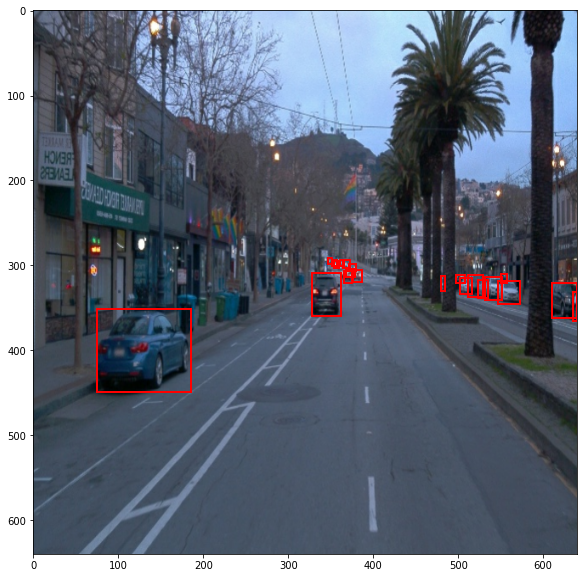

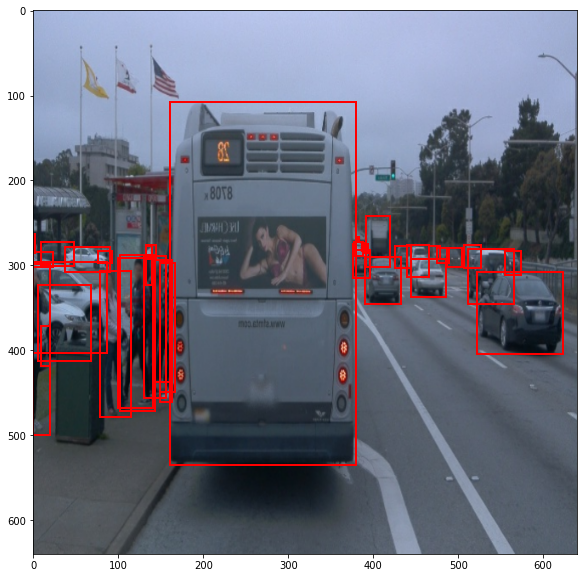

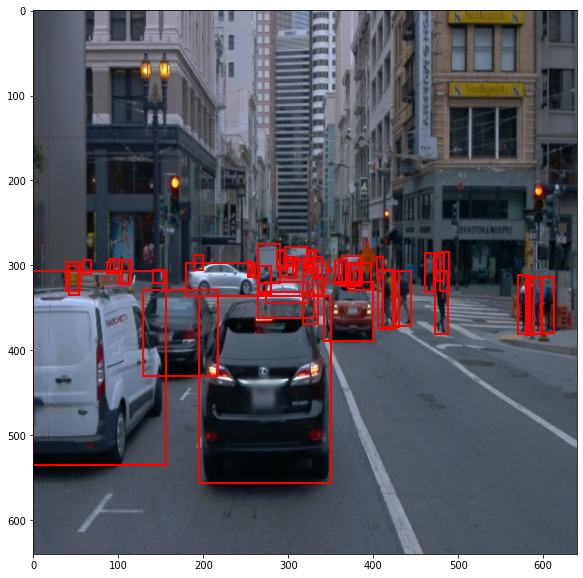

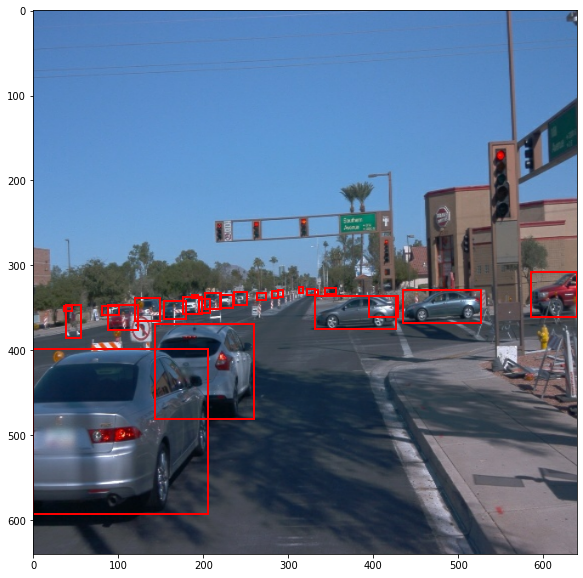

In [15]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)